In [1]:
import pandas as pd
import numpy as np
newData=pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/curric-data-001-data-sets/master/ideal-weight/ideal_weight.csv')
newData.head()


,'id','sex','actual','ideal','diff'
0,0,'Male',215,190,25
1,1,'Female',155,135,20
2,2,'Male',195,155,40
3,3,'Female',145,130,15
4,4,'Female',110,100,10


In [2]:
y=newData.columns.values.tolist() 
y

["'id'", "'sex'", "'actual'", "'ideal'", "'diff'"]

In [3]:
y= list(map(lambda x: x.replace("'", ""), y))

In [4]:
y

['id', 'sex', 'actual', 'ideal', 'diff']

In [5]:
newData.columns=y

In [6]:
newData.head()

,id,sex,actual,ideal,diff
0,0,'Male',215,190,25
1,1,'Female',155,135,20
2,2,'Male',195,155,40
3,3,'Female',145,130,15
4,4,'Female',110,100,10


In [7]:
clean_sex=list(map(lambda x: x.replace("'", ""), newData.sex))

In [8]:
clean_sex[0:5]

['Male', 'Female', 'Male', 'Female', 'Female']

In [9]:
newData.sex=clean_sex

In [10]:
newData.head()

,id,sex,actual,ideal,diff
0,0,Male,215,190,25
1,1,Female,155,135,20
2,2,Male,195,155,40
3,3,Female,145,130,15
4,4,Female,110,100,10


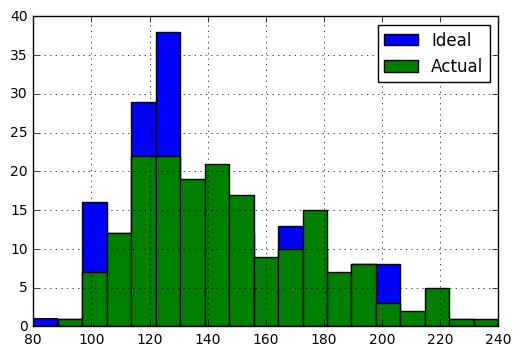

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
binSize = np.linspace(80,240,20)
newData.ideal.hist(bins=binSize, label='Ideal')
newData.actual.hist(bins=binSize, label='Actual')
plt.legend()
plt.show()


In [12]:
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
newData.rename(columns={'diff':'weight_diff'}, inplace=True)

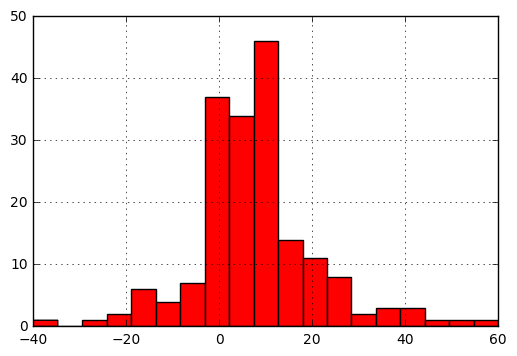

In [13]:
newData.head()
binSize = np.linspace(-40,60,20)
newData.weight_diff.hist(bins=binSize, color='r')

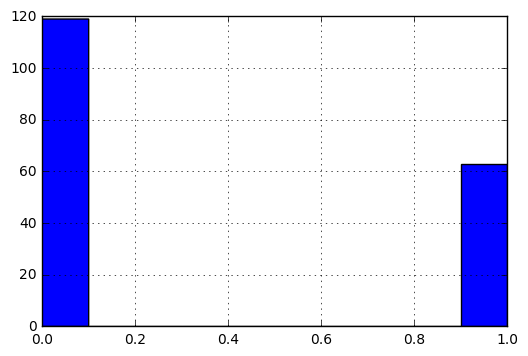

In [98]:
newData.sex=newData.sex.astype('category')
# df.gender.cat.codes
newData.sex.cat.codes.hist()
#males 1 and females 0

In [93]:
newData.head()

,id,sex,actual,ideal,weight_diff
0,0,Male,215,190,25
1,1,Female,155,135,20
2,2,Male,195,155,40
3,3,Female,145,130,15
4,4,Female,110,100,10


In [103]:
#female is 0 and male is coded 1
newData.sex.value_counts()

Female    119
Male       63
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1eba9f41b38>,
  <matplotlib.text.Text at 0x1eba9f47fd0>])

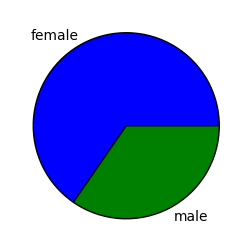

In [110]:
#df.Data.plot(kind='pie')
plt.figure(figsize=(3,3))
plt.pie(newData.sex.value_counts(), labels=['female', 'male'])

In [111]:
#Bayes theorem
#Either use same old formula - intersection/prob of A
#OR SIMPLY MULTIPLY prob of A * ratio calculated comparing area of intersection to area of a
#or another words all Beye's asks for prob of A and B happening area once A has happened
#prob A - area, prob of A and B happening area - both comes from the whole area of possiblities


In [14]:
#Documentation page:  http://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import GaussianNB
import numpy as np

clf=GaussianNB()
y=newData.sex
X=newData[['actual', 'ideal', 'weight_diff']]
clf.fit(X, y)

GaussianNB(priors=None)

In [15]:
y_pred= clf.fit(X, y).predict(X)

In [16]:
print("Mislabeled: ", (X.shape[0], (y !=y_pred).sum()))

Mislabeled:  (182, 14)


In [123]:
print("Accuracy: ", (float((182-14) * 100) / X.shape[0]), "%")

Accuracy:  92.3076923076923 %


In [129]:
clf.predict(([[160, 145, 15]]))

array(['Female'], 
      dtype='<U6')

In [130]:
clf.predict([[145, 160, -15]])

array(['Male'], 
      dtype='<U6')

In [ ]:
#ref
#https://github.com/fredster9/thinkful-data-course/blob/master/naive_bayes.py